# Lec 11.1 Final Project Topics and Predator Prey Modeling

#### Agenda:

1:50 - 2:45
Presentation of student final project topics

2:45- 3:00 Break

3:00 - 4:30 Predator Prey Modeling

## Predator Prey Modeling

See original here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html


###  Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### Numerical solution using Python

A simple python code for solving these equations is shown below.

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [154]:
st_y = alpha/beta
st_x = gamma/delta

In [155]:
#define the time stepping scheme - euler forward, as used in earlier lessons
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [156]:
# define the function that represents the Lotka-Volterra equations
def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

In [157]:
# set time-increment and discretize the time
T  = 15.0            # how long i want to run solution               # final time
dt = 0.01                           # set time-increment, how far going in the future
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [158]:
# get the solutions out the result for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

We will now plot the variation of population for each species with time.

Text(0.5, 1.0, 'predator prey model')

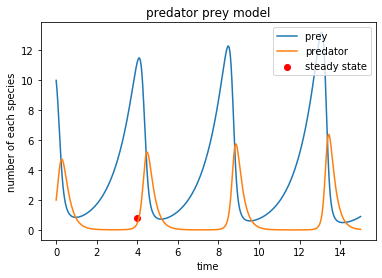

In [159]:
plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.scatter(st_x, st_y, label='steady state', color='red')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

## System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

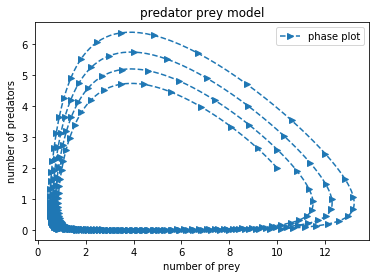

In [160]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

## E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

When you increase the timestep, the rate of predators and prey increases at a slower rate at the function becomes very confused.  

## E.2 Adding the steady state
Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot. What happens if you start at the steady state? What happens if you start near the steady state?

We will now plot the variation of population for each species with time.

Text(0.5, 1.0, 'predator prey model')

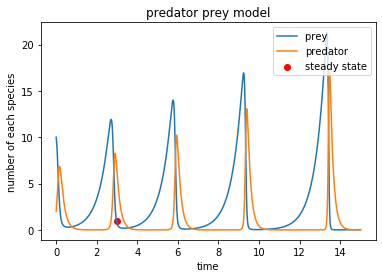

In [143]:
plt.plot(time, x_euler, label = 'prey ')
plt.scatter(st_x, st_y, label='steady state', color='red')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

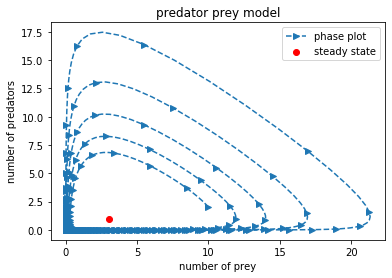

In [144]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.scatter(st_x, st_y, label='steady state', color='red')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

## Another time stepping method with higher order of accuracy

## E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ?

In [129]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

In [130]:
# set time-increment and discretize the time
T  = 15.0            # how long i want to run solution               # final time
dt = 0.01                           # set time-increment, how far going in the future
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_rk4[n+1] = RK4(u_rk4[n], f, dt)

In [131]:
time = np.linspace(0.0, T,N)
x_rk4 = u_rk4[:,0]
y_rk4 = u_rk4[:,1]

Text(0.5, 1.0, 'predator prey model')

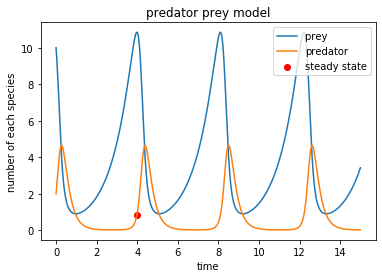

In [132]:
plt.plot(time, x_rk4, label = 'prey ')
plt.scatter(st_x, st_y, label='steady state', color='red')
plt.plot(time, y_rk4, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

## E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

In [145]:
# set time-increment and discretize the time
T  = 15.0            # how long i want to run solution               # final time
dt = 0.01                           # set time-increment, how far going in the future
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# imput initial conditions
u_rk4[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_rk4[n+1] = RK4(u_rk4[n], f, dt)

In [146]:
time = np.linspace(0.0, T,N)
x_rk4 = u_rk4[:,0]
y_rk4 = u_rk4[:,1]

Text(0.5, 1.0, 'predator prey model')

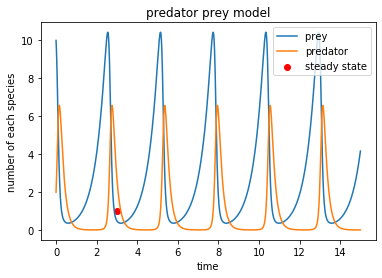

In [147]:
plt.plot(time, x_rk4, label = 'prey ')
plt.scatter(st_x, st_y, label='steady state', color='red')
plt.plot(time, y_rk4, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

## E.5 (Advanced)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example